
Task


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from sklearn.preprocessing import LabelEncode

In [44]:
data_filepath = "/home/rgukt/Downloads/archive (2)/uk_accident.csv"

In [48]:
df = pd.read_csv(data_filepath)
df.head()

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2.02E+12,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2.02E+12,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2.02E+12,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2.02E+12,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2.02E+12,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight


In [46]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values
df.dropna(inplace=True)


Missing values in each column:
 accident_index                    0
speed_limit                       0
light_conditions                  0
weather_conditions                0
road_surface_conditions           0
vehicle_type                      0
junction_location                 0
skidding_and_overturning          0
vehicle_leaving_carriageway       0
hit_object_off_carriageway        0
first_point_of_impact             0
sex_of_driver                     0
age_of_oldest_driver           6450
accident_severity              1172
dtype: int64


In [50]:
# Display the column names
print(df.columns)

Index(['accident_index', 'speed_limit', 'light_conditions',
       'weather_conditions', 'road_surface_conditions', 'vehicle_type',
       'junction_location', 'skidding_and_overturning',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'sex_of_driver', 'age_of_oldest_driver',
       'accident_severity'],
      dtype='object')


In [62]:
# Convert 'speed_limit' and 'age_of_oldest_driver' to numeric types
df['speed_limit'] = pd.to_numeric(df['speed_limit'], errors='coerce')
df['age_of_oldest_driver'] = pd.to_numeric(df['age_of_oldest_driver'], errors='coerce')
df

,accident_index,speed_limit,light_conditions,weather_conditions,road_surface_conditions,vehicle_type,junction_location,skidding_and_overturning,vehicle_leaving_carriageway,hit_object_off_carriageway,first_point_of_impact,sex_of_driver,age_of_oldest_driver,accident_severity
0,2.02E+12,30,darkness,other,wet or damp,at least one van,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,63.0,serious
1,2.02E+12,30,darkness,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,at least one vehicle leaving carriageway,at least one vehicle hit an object,at least one vehicle with frontal impact,all males,82.0,fatal
2,2.02E+12,40,daylight,fine,dry,only cars,at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,data missing or out of range,NaN,serious
3,2.02E+12,40,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,male and female,NaN,serious
4,2.02E+12,30,daylight,fine,dry,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all females,39.0,slight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,2.02E+12,30,darkness,fine,wet or damp,at least one biped,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,27.0,serious
31643,2.02E+12,60,daylight,fine,dry,other,at or within 20 metres of junction,at least one vehicle skidded or overturned,none leaving carriageway,none hit an object,other points of impact,all males,27.0,serious
31644,20191369p0654,70,daylight,fine,dry,at least one van,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,at least one vehicle with frontal impact,all males,67.0,slight
31645,2.02E+12,30,darkness,fine,wet or damp,only cars,not at or within 20 metres of junction,no skidding or overturning,none leaving carriageway,none hit an object,other points of impact,all males,24.0,fatal


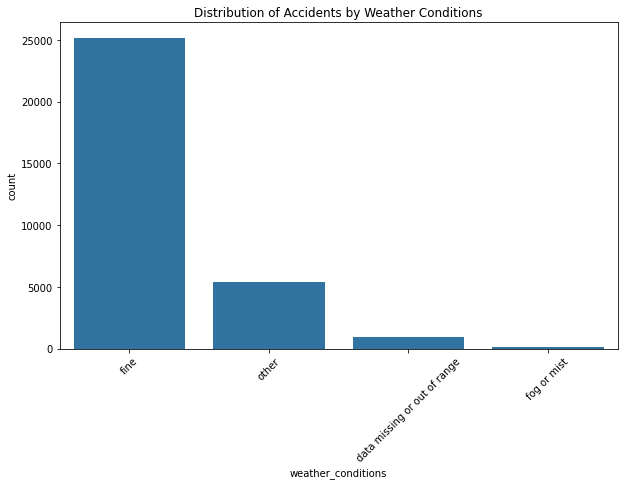

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the distribution of accidents by weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather_conditions', order=df['weather_conditions'].value_counts().index)
plt.title('Distribution of Accidents by Weather Conditions')
plt.xticks(rotation=45)
plt.show()


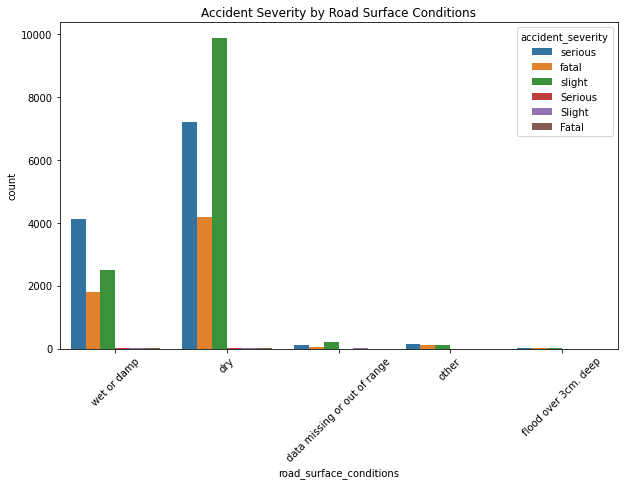

In [53]:
# Plotting accident severity against road surface conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='road_surface_conditions', hue='accident_severity')
plt.title('Accident Severity by Road Surface Conditions')
plt.xticks(rotation=45)
plt.show()
